In [1]:
% matplotlib

Using matplotlib backend: TkAgg


In [1]:
% matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
import datetime
import time
import pickle
from datetime import datetime, date , timedelta
import seaborn as sns 
import pylab as pl

In [5]:
import seaborn as sns 
import pylab as pl

In [17]:
t1 = time.time()
df = pd.read_csv('diabetes.csv')
print(time.time()-t1)  
#  reading time = 73.35 secs

25.8231909275


In [8]:
# df.shape = (610383, 648)
# len(df.columns) = 648
# len(set(df['uid'])) = 111291
# sum(df['diabetes']==1) = 6509

In [5]:
uid_set = set(df.uid)

In [6]:
len(uid_set)

111291

### 製作 得糖尿病 名單

In [23]:
with_diabetes = set(df.uid[df.diabetes==1])
len(with_diabetes)

3317

### 製作 非糖尿病 名單

In [ ]:
'''
s1.union(s2)
s1.difference(s2)
s1.intersection(s2)
'''

In [24]:
ever_without_diabetes = set(df.uid[df.diabetes==0])
print(len(ever_without_diabetes)  )
print( len(with_diabetes.union(ever_without_diabetes))    )

111291
111291


In [10]:
without_diabetes = ever_without_diabetes.difference(with_diabetes)
len(without_diabetes)

107974

###  得糖尿病比例

In [54]:
print(str(100 * 3317./111291.)+'   %')

2.9804746116   %


### 製作 得糖尿病 資料

In [44]:
with_diab_list = list(with_diabetes)

In [50]:
t1 = time.time()
df_concat = df[df.uid==with_diab_list[0]]
for i in range(1,len(with_diab_list)):
    df_new = df[df.uid==with_diab_list[i]]
    df_concat = pd.concat([df_concat,  df_new], axis=0)
print(time.time() - t1)

1370.91799998


In [54]:
df_concat.shape

(25142, 648)

In [65]:
diab_index = list(df_concat.index)

In [66]:
len(diab_index)

25142

### 製作 非糖尿病 資料

In [67]:
t1 = time.time()
df_no_diab = df.drop( diab_index )
print(time.time() - t1)

77.8310000896


### 儲存切好的 非糖尿病 / 得糖尿病 資料

In [ ]:
df_concat.to_csv('with_diabetes.csv', index=False)

In [68]:
df_no_diab.to_csv('without_diabetes.csv', index=False)

### 載入切好的 非糖尿病 / 得糖尿病 資料

In [6]:
df_diab = pd.read_csv('with_diabetes.csv')

In [14]:
df_no_diab = pd.read_csv('without_diabetes.csv')

### 重建 特徵字典

In [7]:
dict_df = pd.read_csv('dict_.csv')
dict_ = {}
for idx in dict_df.index:
    dict_[dict_df.feature[idx]] = dict_df.description[idx]

In [8]:
df = df_diab
cols = list(df.columns)

In [9]:
df.shape

(25142, 648)

In [10]:
t1 = time.time()
null_percentage = []
for colname in cols:
    null_percentage.append(sum(df[colname].isnull() )/25142.)
print(time.time() - t1)

15.1276631355


In [ ]:
dict_['cr_fobt']
dict_['pronormal']
dict_[]

In [11]:
df.columns[:50]

Index([u'uid', u'gender', u'age', u'diabetes', u'yr', u'mon', u'day',
       u'bloodtype', u'whichhand', u'twins', u'earlobe', u'tongue',
       u'forehead', u'eyetype', u'dimple', u'thumb', u'forefinger',
       u'lfinger1', u'lfinger2', u'lfinger3', u'lfinger4', u'lfinger5',
       u'rfinger5', u'rfinger4', u'rfinger3', u'rfinger2', u'rfinger1',
       u'bornweight', u'father', u'gfather_f', u'gmother_f', u'mother',
       u'gfather_m', u'gmother_m', u'marriage_96', u'marriage_98',
       u'marriage_14', u'education', u'occupation', u'pollution', u'solvent',
       u'asbestos', u'coalash', u'paint', u'radiation', u'pesticide',
       u'others', u'ergonomic', u'nopolution', u'fincome'],
      dtype='object')

In [12]:
### Determine the data type
d_types = []
for idx in range(648):
    rand_1 = np.random.choice(10000,5, replace =False )
    ft = cols[idx]
    #pd.DataFrame( [type(df[ft][idx]) for idx in rand_1] ).value_counts()
    sorted(pd.DataFrame( [type(df[ft][idx]) for idx in rand_1] )[0].value_counts())
    d_type = np.argmax(pd.DataFrame( [type(df[ft][idx]) for idx in rand_1] )[0].value_counts())   
    d_types.append(d_type) 
#pd.DataFrame(d_types)[0].value_counts()

In [11]:
### Select features with fewer missing values
missing_threshold = 0.2
idx_usable = [idx for idx in range(len(cols)) if null_percentage[idx] < missing_threshold]
fts_usable = [cols[idx] for idx in idx_usable]
print(len(fts_usable), 'features were left')
#df = df[fts_usable]
#cols_select = df.columns

217 features were left


In [25]:
cnt = 0
for ii_ in range(648):
    summary_ = df[cols[ii_]].describe()
    if len(summary_)!=8:
#        print(len(summary_))
        cnt+=1
        print('anomalous feature index: %d'% ii_)
        print('corresponding name: ' + str(cols[ii_])  )
print('Have %d anomalous features' % cnt)


anomalous feature index: 0
corresponding name: uid
anomalous feature index: 534
corresponding name: ur_ot
Have 2 anomalous features


In [96]:
cnt = 0
for jj_ in range(25142):
    if type(df[cols[534]][jj_]) == str:
#        print(jj_, df[cols[534]][jj_])
        cnt += 1
print(cnt)

1045


In [37]:
df[cols[534]].describe()

count     1045
unique      53
top       黏液絲狀
freq       517
Name: ur_ot, dtype: object

In [145]:
### construct the description for all features:

### deal with feature 'uid'
df0 = pd.Series(np.zeros(8))
df0.index = df[cols[1]].describe().index
concat_ = df0
type_list = [str]

### deal with features No.1 to No.533 
for ii_ in range(1,534):
    concat_ = pd.concat([concat_, df[cols[ii_]].describe()], axis =1)
    type_list.append(df[cols[ii_]].describe().dtype   )

### deal with feature 'ur_ot':
df534 = pd.Series(np.zeros(8))
df534.index = df[cols[1]].describe().index
concat_ = pd.concat([concat_, df534], axis =1)
type_list.append(  str   )

### deal with features No.535 to No.648 
for ii_ in range(535,648):
    concat_ = pd.concat([concat_, df[cols[ii_]].describe()], axis =1)
    type_list.append(df[cols[ii_]].describe().dtype   )
    
concat_.columns.values[0] = 'uid'
concat_.columns.values[534] = 'ur_ot'

### combine the "data type" row into the big dataframe "concat_"
df_type = pd.DataFrame( np.array(type_list).reshape([1,648]) )
df_type.columns = concat_.columns
concat_ = pd.concat([concat_, df_type  ], axis = 0)
concat_.index.values[8] = 'type'

descp_path = './save_features/feature_description.csv'
concat_.to_csv(descp_path, index = False)

## Process features, ONE BY ONE:

In [11]:
### Read the description for all features:
descp_path = './save_features/feature_description.csv'
df_desc = pd.read_csv(descp_path)
df_desc.index = [u'count', u'mean', u'std', u'min', u'25%',
                 u'50%', u'75%', u'max', u'type']

In [12]:
### Read the process record:
record_path = './save_features/process_record_0312_ny.csv'
df_process = pd.read_csv(record_path)
##df_process.to_csv(record_path, index =False)

In [13]:
df_process.head(1)

,ft_name,num_var,cate_var,other_var,drop_var,fill_with_most,fill_with_unknown,fill_with_mean,fill_with_pre,combined_with,reduce_class,year_consistancy,other_error,embeddings
0,uid,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
### Read just one feature in the document "./save_features" :
#file_path = './save_features/'+str(idx)+'_'+str(ft)+'.csv'
#df_one_ft = pd.read_csv(file_path)

In [ ]:
'''
step 1: Run the feature summary. 
     1-1 If the 'Attention!...' appears, check:
          **missing percentage is too high? ( > 0.4)
          **maximum is not reasonable?      ( > 20)
          **minimun is not reasonable?      ( < 0 )
     1-2 Did the histogram show ? If not, check "wrong data type".
     
step 2: Determine the processing strategy (Fill the process_record)

step 3: Processing and save the feature
     3-1 categorical variable
        ** fill the missing values
        ** one-hot encoding
     3-2 numerical variable
        ** fill the missing values
        ** normalize
'''

In [14]:
### find the starting point for each id -- column ['uid_start'] :
df['uid_start'] = df['uid'] != df['uid'].shift(1)

In [23]:
### construct columns ['date', 'delta_month']:
df['date'] = df.apply(lambda row: datetime(
          row['yr'], row['mon'], row['day']), axis=1)
## 365 days = 31536000 seconds , 30 days = 2592000 seconds.
df['delta_yr'] = df['date'].diff().dt.total_seconds().fillna(0)/31536000.  
df.loc[df['uid_start']==True, 'delta_yr']= 0
#df['delta_month'] = df['date'].diff().dt.total_seconds().fillna(0)/2592000.  
#df.loc[df['uid_start']==True, 'delta_month']= 0

isd_hbabcv
('max=', 13.07, 'min=', 0.029999998999999999, 'mean=', 2.5227272702689394)
Attention! Attention! Attention! Attention! 
Attention! Attention! Attention! Attention! 
Attention! Attention! Attention! Attention! 


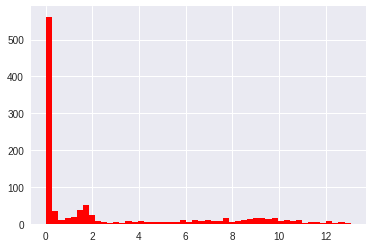

In [107]:
idx = 500
ft = cols[idx]
df_one_ft = df[ ft ]
print( ft )
#print( ft, dict_[ft]  )
null_thres = 0.4
#print('null percent:', null_percentage[idx])
#print( 'possible values:', set(df_one_ft))
summary_ = df_one_ft.describe()
print('max=', summary_[7], 'min=', summary_[3], 'mean=', summary_[1]  )
if (summary_[7]>20 or summary_[3]<0 or null_percentage[idx]> null_thres):
    print('Attention! Attention! Attention! Attention! ')
    print('Attention! Attention! Attention! Attention! ')
    print('Attention! Attention! Attention! Attention! ')
#print( summary_ )
#print( df_one_ft.value_counts() )
df_one_ft.hist(bins=50, figsize=(6,4),color='red')
plt.show()
#print(sorted(df_one_ft))

#flat = df[ ft ]
#bins = np.linspace(np.min(flat), np.max(flat), 50)
#plt.hist(flat, bins=bins, color = 'blue')
#plt.show()

In [31]:
### Numerical variables 
t1 = time.time()
#summary_ = df_one_ft.describe()
max_ = summary_[7]  
min_ = summary_[3]
mean_ = summary_[1]
std_ = summary_[2]

## 1. data type transfer: from numpy.int64 to numpy.float64
#df_float = [float(df[ft][idx]) for idx in range(25142)  ]
df_float = df[ft].astype('float')

## 2. fill missing values
df_float[df_float.isnull()==True]= mean_

## 3. normalization
#    df_float = (df_float - min_)/(max_ - min_)
for idx_ in range(25142):
    df_float[idx_] = (df_float[idx_] - mean_)/std_

## 4. record the processing strategy
df_process['num_var'].values[idx] = 1
df_process['fill_with_mean'].values[idx] = 1

file_path = './save_features/numerical/'+str(idx)+'_'+str(ft)+'.csv'
df_float.to_csv(file_path, index =False)
    
time.time() - t1

0.31124401092529297

In [474]:
### Drop variables 

df_process['drop_var'].values[idx] = 1
#df_process['combined_with'][idx] = 1
#df_process['reduce_class'][idx] = 1
#df_process['year_consistancy'][idx] = 1
#df_process['other_error'][idx] = 1

file_path = './save_features/drop/'+str(idx)+'_'+str(ft)+'.csv'
df_one_ft.to_csv(file_path, index =False)


In [251]:
### Other variables -- which needs extra considerations

df_process['other_var'].values[idx] = 1
#df_process['combined_with'][idx] = 1
#df_process['reduce_class'][idx] = 1
#df_process['year_consistancy'][idx] = 1
#df_process['other_error'][idx] = 1

file_path = './save_features/other/'+str(idx)+'_'+str(ft)+'.csv'
df_one_ft.to_csv(file_path, index =False)


In [257]:
(df_one_ft.value_counts())

0.0    10309
1.0     7453
2.0     7380
Name: nutrino, dtype: int64

In [348]:
### Processing categorical variable
t1 = time.time()

max_ = summary_[7]  
min_ = summary_[3]

## 1. fill missing values
df_one_ft[df_one_ft.isnull()==True]= max_ + 1
df_process['fill_with_unknown'].values[idx] = 1
#df_one_ft[df_one_ft.isnull()==True]= (df_one_ft.value_counts()).index[0]
#df_process['fill_with_most'].values[idx] = 1

#if null_percentage[idx]> null_thres:
#    df_one_ft[df_one_ft.isnull()==True]= max_ + 1
#    df_process['fill_with_unknown'].values[idx] = 1
#elif sum(df_one_ft.isnull() ) == 0:
#    break
#else:
#    df_one_ft[df_one_ft.isnull()==True]= (df_one_ft.value_counts()).index[0]
#    df_process['fill_with_most'].values[idx] = 1

## 2. one-hot encoding:
df_one_hot = pd.get_dummies(df_one_ft)
df_one_hot.columns = [ft+'_'+str(col) for col in df_one_hot.columns]

## 3. record the processing strategy
df_process['cate_var'].values[idx] = 1

file_path = './save_features/categorical/'+str(idx)+'_'+str(ft)+'.csv'
df_one_hot.to_csv(file_path, index =False)

time.time() - t1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.07622480392456055

In [475]:
### Save df_process to csv file:
record_path = './save_features/process_record_0320_ny_303_to_500.csv'
df_process.to_csv(record_path, index =False)

In [ ]:
'''
An interesting feature:
'cbc_mcv'
'cbc_mch'
'cpi_ts'
'isd_hbagsv'
'''

In [ ]:
### DEAL WITH TIME FORMAT DATA:
'''
min_ = datetime.strptime('2020/01/01', "%Y/%m/%d")
max_ = datetime.strptime('1950/01/01', "%Y/%m/%d")
for i_ in range(len(PO_7_110)):
#    val_ = int(PO_7_110['caldt'][i_][:4]) 
    val_ = datetime.strptime(PO_7_110['caldt'][i_], "%Y/%m/%d")
    if val_.date() < min_.date():
        min_ = val_
    if val_.date() > max_.date():
        max_ = val_
print(min_, max_)
# from_date = date.today()-timedelta(days=3)
# val_.date() > from_date
'''

In [89]:
#import pickle
with open("df_num.txt", "wb") as fp:   #Pickling
    pickle.dump(df_num, fp)
with open("min_max.txt", "wb") as fp:   #Pickling
    pickle.dump(min_max, fp)
with open("df_cat.txt", "wb") as fp:   #Pickling
    pickle.dump(df_cat, fp)
with open("drop_list.txt", "wb") as fp:   #Pickling
    pickle.dump(drop_list, fp)
################################# 
with open("df_num.txt", "rb") as fp:   # Unpickling
    df_num = pickle.load(fp)
with open("min_max.txt", "rb") as fp:   # Unpickling
    min_max = pickle.load(fp)
with open("df_cat.txt", "rb") as fp:   # Unpickling
    df_cat = pickle.load(fp)
with open("drop_list.txt", "rb") as fp:   # Unpickling
    drop_list = pickle.load(fp)
#################################
with open('df_num.txt', 'rb') as fp:
    u = pickle._Unpickler(fp)
    u.encoding = 'latin1'
    df_num = u.load()
with open('min_max.txt', 'rb') as fp:
    u = pickle._Unpickler(fp)
    u.encoding = 'latin1'
    min_max = u.load()
with open('df_cat.txt', 'rb') as fp:
    u = pickle._Unpickler(fp)
    u.encoding = 'latin1'
    df_cat = u.load()
with open('drop_list.txt', 'rb') as fp:
    u = pickle._Unpickler(fp)
    u.encoding = 'latin1'
    drop_list = u.load()

In [30]:
#df_cat=[]
#df_num = []
#min_max = []
#drop_list = []

In [ ]:
for i_ in range(70,87):
    idx = idx_usable[   i_    ]
    ft = cols[idx]

In [264]:
    ### Numerical variables 
    ## 1. data type transfer: from numpy.int64 to numpy.float64
    #df_float = [float(df[ft][idx]) for idx in range(25142)  ]
    df_float = df[ft].astype('float', copy=True)

    ## 2. fill missing values
    mean_ = np.mean(df_float)
    df_float[df_float.isnull()==True]= np.mean(df_float)

    ## 3. normalization
    min_ = np.min(df_float)
    max_ = np.max(df_float)   
#    df_float = (df_float - min_)/(max_ - min_)
    for idx_ in range(25142):
        df_float[idx] = (df_float[idx_] - min_)/(max_ - min_)
    df_num.append([idx, df_float])
    min_max.append([idx, min_, max_])

In [267]:
len_ = len(min_max)
for j_ in range(len_-8,len_):
#for j_ in range(-8,-0):
    print( min_max[j_][0]  )

383
386
403
405
407
409
429
430


In [240]:
len_

100

In [238]:
df_num.pop(100)
min_max.pop(100)

[403, 1.0, 5.0]

In [45]:
#df_num[82][0]=346

In [395]:
### check if the processing  is reasonable
# 1. for numerical variables:
#for obj in min_max:
#    if obj[1]<0. or obj[2]>6.:
#        print(obj[0], obj[1], obj[2])

In [48]:
sum(df[ft].isnull())/25412.

0.020816936880214073

In [ ]:
df[cols[310]]

In [270]:
cols[87]
idx

431

In [225]:
for i_ in range(403,411,2):
    print(cols[i_])

food20_98
food23_98
food24_98
food25_98


g_bmi
身體質量指數
data type <class 'numpy.float64'>
null percent 0.0003579667488664386
count    25133.000000
mean        25.311595
std          4.031893
min         12.802926
25%               NaN
50%               NaN
75%               NaN
max         50.760326
Name: g_bmi, dtype: float64


/home/ny/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


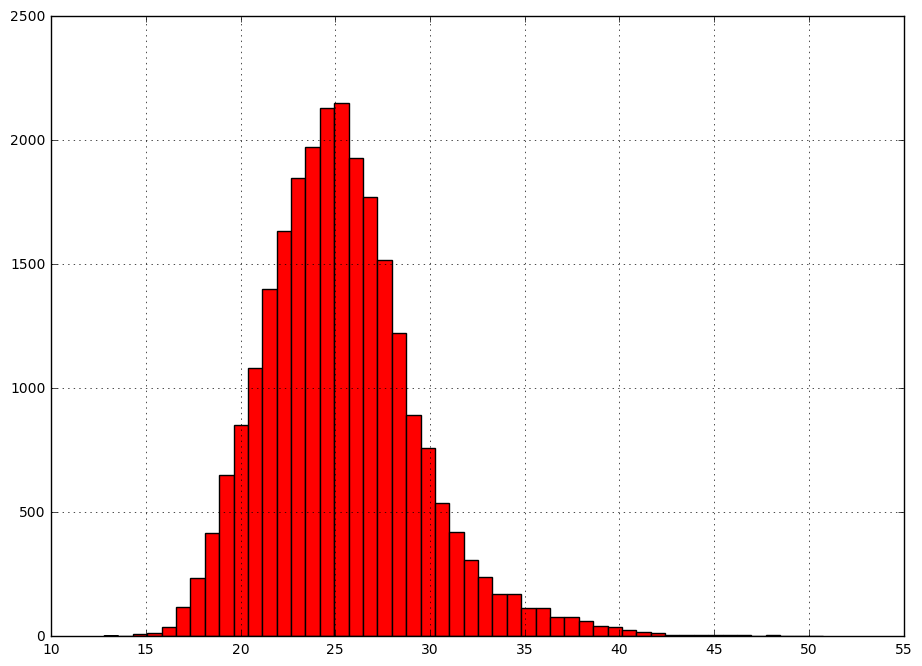

22.592533    8
22.290512    7
25.160698    7
23.059315    7
24.653254    7
23.850155    7
23.317591    7
22.160666    6
26.818117    6
24.498270    6
24.049681    6
25.314175    6
22.714979    6
25.443186    6
22.105629    6
23.238926    6
24.605921    6
21.751322    6
23.515625    6
27.036736    6
26.014496    6
24.438887    6
24.287401    6
23.262991    6
25.349253    6
27.842058    6
24.224766    6
24.502239    6
25.641026    6
22.455156    6
            ..
27.920498    1
22.240932    1
29.581751    1
16.170414    1
30.948605    1
29.972967    1
19.436752    1
31.527826    1
34.129032    1
25.637869    1
22.224375    1
28.102577    1
27.343777    1
26.989204    1
24.246014    1
31.509796    1
33.001938    1
27.447483    1
30.330215    1
28.680109    1
27.636377    1
20.421764    1
29.515572    1
28.535740    1
26.792439    1
31.017355    1
30.634003    1
24.303679    1
24.889303    1
26.709366    1
Name: g_bmi, dtype: int64


In [269]:
idx = idx_usable[   115    ]
#idx = 368
ft = cols[idx]
print( ft )
print(  dict_[ft]  )
print('data type', type(df[ft][0]) )  
print('null percent', null_percentage[idx])
print(df[ ft ].describe()  )
df[cols[idx]].hist(bins=50, figsize=(11,8),color='red')
plt.show()
print(   df[ ft ].value_counts() )
#print(sorted(df[ ft ]))

#flat = df[ ft ]
#bins = np.linspace(np.min(flat), np.max(flat), 50)
#plt.hist(flat, bins=bins, color = 'blue')
#plt.show()

In [23]:
df_categ = df[ft]
#df_categ[df_categ.isnull()==True]= 2.
df_one_hot = pd.get_dummies(df_categ)
df_one_hot.columns = [ft+'_'+str(col) for col in df_one_hot.columns]

In [24]:
#df_num = pd.concat([df_num, df_new], axis=1)
df_cat.append([idx, df_one_hot])

In [116]:
for obj in df_cat:
    print(obj[0])

1
35


In [115]:
#df_cat.pop(2)

In [ ]:
dm_fg(QX) , dm_fg2(QY) , dm_g(QZ) , ushbalc2(VJ)

In [271]:
for j_ in rnage()

0

In [194]:
### features TO DROP:
drop_list.append([idx,ft])
#df = df.drop(drop_list, axis = 1)

In [15]:
drop_list

[[3, 'diabetes'],
 [4, 'yr'],
 [5, 'mon'],
 [6, 'day'],
 [40, 'solvent'],
 [38, 'occupation'],
 [41, 'asbestos'],
 [44, 'radiation'],
 [47, 'ergonomic'],
 [83, 'mdrug05'],
 [106, 'psick10']]

In [129]:
### combine food features 
for i_ in range(356,370,2):
    select_ = df[cols[i_]].isnull()
    df[cols[i_]][select_]=df[cols[i_-1]][select_]

/home/ny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [226]:
for i_ in range(403,411,2):
    select_ = df[cols[i_]].isnull()
    df[cols[i_]][select_]=df[cols[i_-1]][select_]

/home/ny/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [ ]:
df_sport_time = df[cols[314]]

df_sport_time[df[cols[310]]==1]=1.
df_sport_time[df[cols[310]]==0]=0.
df_sport_time[df[cols[311]]==1]=2.
df_sport_time[df[cols[311]]==0]=0.
df_sport_time[df[cols[312]]==1]=3.
df_sport_time[df[cols[312]]==0]=0.
df_sport_time[df[cols[313]]==1]=4.
df_sport_time[df[cols[313]]==0]=0.

In [ ]:
### processing sport features: feature 309~313
df_sport = df[cols[309]]
df_sport[df_sport==5] = 0

df_sport[df[cols[310]]==1]=1.
df_sport[df[cols[310]]==0]=0.
df_sport[df[cols[311]]==1]=2.
df_sport[df[cols[311]]==0]=0.
df_sport[df[cols[312]]==1]=3.
df_sport[df[cols[312]]==0]=0.
df_sport[df[cols[313]]==1]=4.
df_sport[df[cols[313]]==0]=0.

In [350]:
### processing smokeornot features: feature 267~270

df_smoke = df[cols[270]]
df_smoke.name = 'smokeornot'
#print(sum(df[cols[270]].isnull())/25412.)

sellect_ = df['yr']==1996
df_96 = df[cols[267]]
df_smoke[sellect_] = df_96[sellect_]

sellect_ = df['yr']==1997
df_97 = df[cols[268]]
df_smoke[sellect_] = df_97[sellect_]

sellect_ = df['yr']==1998
df_98 = df[cols[269]]
df_smoke[sellect_] = df_98[sellect_]

print(sum(df_smoke.isnull())/25412.)

0.25783094601


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [128]:
### Concate all dataframe in the list

df_test = df_num[0][1]
for idx in range(1,16):
    df_test = pd.concat([df_test, df_num[idx][1]], axis=1)
df_test.shape

(25142, 16)

In [150]:
### Categorical variables -- one hot encoding
#df_one_hot = pd.get_dummies(df[ft])

In [140]:
#pd.concat([df_old, df_new], axis=1)

In [16]:
df.columns[:50]

Index([u'uid', u'gender', u'age', u'diabetes', u'yr', u'mon', u'day',
       u'marriage_98', u'education', u'occupation', u'solvent', u'asbestos',
       u'radiation', u'ergonomic', u'infect', u'mdrug01', u'mdrug02',
       u'mdrug03', u'mdrug04', u'mdrug05', u'mdrug06', u'mdrug07', u'mdrug08',
       u'mdrug10', u'mdrug11', u'mdrug12', u'mdrug13', u'mdrug14', u'mdrug15',
       u'mdrug09', u'nopsick', u'psick01', u'psick02', u'psick03', u'psick04',
       u'psick05', u'psick06', u'psick08', u'psick09', u'psick10', u'psick11',
       u'psick12', u'psick13', u'psick14', u'psick15', u'psick16', u'psick17',
       u'psick18', u'psick19', u'psick20'],
      dtype='object')

In [147]:
### Categorical variables  
## 1. one hot encoding
idx = 1
ft = cols_select[idx]
df_one_hot = pd.get_dummies(df[ft])
df_one_hot.columns = [ft+'_'+str(col) for col in df_one_hot.columns]

## 2. concate to generate new dataframe
df_old = df['uid']
df_new = df_one_hot
df_old = pd.concat([df_old, df_new], axis=1)
df_old.head()

,uid,gender_1,gender_2
0,mj0114219,0.0,1.0
1,mj0114219,0.0,1.0
2,mj0114219,0.0,1.0
3,mj0114219,0.0,1.0
4,mj0114219,0.0,1.0


In [23]:
dict_min_max[ft]

(6.0, 95.0)

gender
性別
('null percent', 1.0)
count    25142.000000
mean         1.480153
std          0.499616
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: gender, dtype: float64


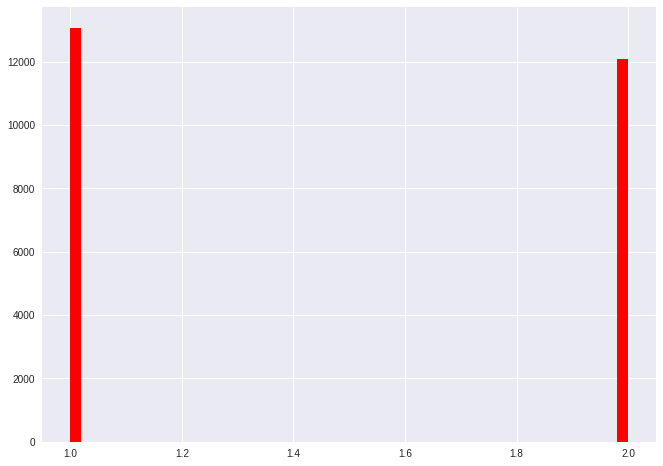

1    13070
2    12072
Name: gender, dtype: int64


In [72]:
idx = 1
ft = cols[idx]
print( ft )
print(  dict_[ft]  )
print('null percent', 1- null_percentage[idx])
print(df[ ft ].describe()  )
df[cols[idx]].hist(bins=50, figsize=(11,8),color='red')
plt.show()
print(   df[ ft ].value_counts() )
#print(sorted(df[ ft ]))

#flat = df[ ft ]
#bins = np.linspace(np.min(flat), np.max(flat), 50)
#plt.hist(flat, bins=bins, color = 'blue')
#plt.show()

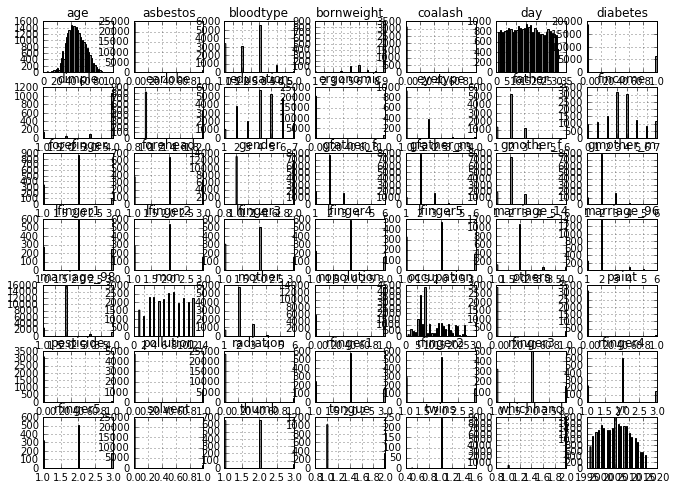

In [99]:
df[df.columns[:50]].hist(bins=50, figsize=(11,8),color='grey')
plt.show()

In [57]:
cc = df[ ft ].value_counts()
for crit in range(2,26):
    print(crit+1, sum(cc[cc>crit]))

(3, 25142)
(4, 23666)
(5, 21862)
(6, 19962)
(7, 18054)
(8, 16010)
(9, 13786)
(10, 11986)
(11, 10296)
(12, 8591)
(13, 7199)
(14, 6042)
(15, 4656)
(16, 3321)
(17, 2329)
(18, 1615)
(19, 841)
(20, 499)
(21, 219)
(22, 72)
(23, 50)
(24, 50)
(25, 50)
(26, 0)


In [346]:
### copy a dataframe without changing the original one

aaa = pd.DataFrame([[1,2],[3,4]])
aaa.columns = ['a','b']
bbb = aaa
ccc = bbb
ddd = ccc.copy(deep=True)
ccc['b']=1000
#aaa
ddd

,a,b
0,1,2
1,3,4


In [347]:
#df[["yr",'gender']]

In [21]:
df.head()

,uid,gender,age,diabetes,yr,mon,day,bloodtype,whichhand,twins,...,igaantiea,igaantivca,ct_calcium,ntprobnp,caronormal,sevanum,sevaact,sevago,sevanom,testost
0,mj0114219,2,48,0,2005,3,12,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mj0114219,2,49,0,2006,10,21,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mj0114219,2,51,0,2008,6,20,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mj0114219,2,53,0,2010,8,26,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mj0114219,2,54,0,2011,10,7,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(cols[:50])

['uid', 'gender', 'age', 'diabetes', 'yr', 'mon', 'day', 'bloodtype', 'whichhand', 'twins', 'earlobe', 'tongue', 'forehead', 'eyetype', 'dimple', 'thumb', 'forefinger', 'lfinger1', 'lfinger2', 'lfinger3', 'lfinger4', 'lfinger5', 'rfinger5', 'rfinger4', 'rfinger3', 'rfinger2', 'rfinger1', 'bornweight', 'father', 'gfather_f', 'gmother_f', 'mother', 'gfather_m', 'gmother_m', 'marriage_96', 'marriage_98', 'marriage_14', 'education', 'occupation', 'pollution', 'solvent', 'asbestos', 'coalash', 'paint', 'radiation', 'pesticide', 'others', 'ergonomic', 'nopolution', 'fincome']


In [348]:
## use pop to delete an element in a list
aaa = [1,3,4,5,6,10]
aaa.pop(2)
aaa

[1, 3, 5, 6, 10]

In [349]:
df_diab[:10]

,uid,gender,age,diabetes,yr,mon,day,bloodtype,whichhand,twins,...,igaantiea,igaantivca,ct_calcium,ntprobnp,caronormal,sevanum,sevaact,sevago,sevanom,testost
0,mj0114219,2,48,0,2005,3,12,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mj0114219,2,49,0,2006,10,21,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mj0114219,2,51,0,2008,6,20,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mj0114219,2,53,0,2010,8,26,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mj0114219,2,54,0,2011,10,7,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,mj0114219,2,56,1,2013,7,24,1.0,2.0,NaN,...,NaN,2.0,NaN,-9995.0,-9995.0,NaN,NaN,NaN,NaN,NaN
6,mj0114219,2,57,1,2014,12,2,1.0,2.0,NaN,...,NaN,2.0,NaN,-9995.0,-9995.0,NaN,NaN,NaN,NaN,NaN
7,mj0114219,2,58,1,2015,12,11,NaN,NaN,NaN,...,NaN,2.0,NaN,-9995.0,-9995.0,NaN,NaN,NaN,NaN,NaN
8,mj0540286,1,42,0,1996,7,23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,mj0540286,1,43,0,1997,10,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_diab[df_diab.uid=='mj0060066']

,uid,gender,age,diabetes,yr,mon,day,bloodtype,whichhand,twins,...,igaantiea,igaantivca,ct_calcium,ntprobnp,caronormal,sevanum,sevaact,sevago,sevanom,testost
24609,mj0060066,1,50,0,2002,7,23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24610,mj0060066,1,51,0,2003,8,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24611,mj0060066,1,52,1,2004,8,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24612,mj0060066,1,53,0,2005,8,4,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24613,mj0060066,1,54,0,2006,8,2,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,-9995.0,NaN,NaN,NaN,NaN,NaN
24614,mj0060066,1,55,0,2007,8,8,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,-9995.0,NaN,NaN,NaN,NaN,NaN
24615,mj0060066,1,56,0,2008,8,7,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,-9995.0,NaN,NaN,NaN,NaN,NaN
24616,mj0060066,1,57,0,2009,8,5,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,-9995.0,NaN,NaN,NaN,NaN,NaN
24617,mj0060066,1,58,0,2010,8,4,3.0,2.0,NaN,...,NaN,NaN,NaN,-9995.0,-9995.0,NaN,NaN,NaN,NaN,NaN
24618,mj0060066,1,59,0,2011,8,3,3.0,2.0,NaN,...,NaN,NaN,NaN,-9995.0,-9995.0,NaN,NaN,NaN,NaN,NaN


In [49]:
sum(df_diab.diabetes[df_diab.uid=='mj0060066'])

1

In [31]:
np.repeat([], [4], axis=0)
df0 = pd.DataFrame(np.array([1]*648).reshape(1,648) )
df0.columns = df.columns

array([], dtype=float64)

In [7]:
aa = (df['yr'] ==2003)&(df['diabetes'] ==0)

0     True
1    False
dtype: bool

In [ ]:
'''
no_diabetes_id = []
for id in uid_set:
    t1 = time.time()
    df_one_person = df[df.uid ==id]
#    if (len(df_one_person.diabetes) == sum(df_one_person.diabetes) ) &  :
    if sum(df_one_person.diabetes) == 0:
        no_diabetes_id.append(id)
    print(time.time() - t1)
'''

In [57]:
stat = df.describe()

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [85]:
df[u'gender'].value_counts()

2    332951
1    277432
Name: gender, dtype: int64

In [29]:
array_ = np.array(df)

In [58]:
ccc = df[(df.yr ==2003)&(df.diabetes ==0)]

In [20]:
x=float('nan')
math.isnan(x)

True

In [23]:
float('inf')

inf

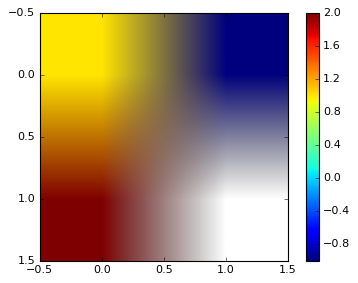

In [46]:
from matplotlib import cm
array = np.array([[1,-1],[2,x]])
#plt.imshow(array, cmap=cm.afmhot)
plt.imshow(array)
plt.colorbar()
plt.show()

In [24]:
arr = np.arange(6).reshape(2, 3)
print(arr)
np.place(arr, arr>2, [44, 55])
arr

[[0 1 2]
 [3 4 5]]


array([[ 0,  1,  2],
       [44, 55, 44]])

In [ ]:
np.place(arr, arr==x, [44, 55])

In [27]:
np.min(np.array([1,x,7]))

nan

In [47]:
df = df.drop([u'ur_ot'], axis = 1)

In [49]:
df[df>3000]=x

In [50]:
df[df<-3000]=x

In [31]:
max_

array(['mj0965860', 2L, 109L, 1L, 2016L, 12L, 31L, 3.0, 2.0, nan, 2.0, 1.0,
       2.0, 1.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,
       2.0, 2.0, 9.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, nan, nan, 2.0, 6.0,
       19.0, nan, 1L, 1L, nan, nan, 1L, nan, nan, 1.0, 1.0, 6.0, nan, 1.0,
       2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0,
       nan, nan, nan, nan, 2.0, nan, nan, 2.0, 0.0, 0.0, 1.0, 12.0, 31.0,
       1.0, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 0.0, 1L,
       1.0, 0.0, 1.0, 1L, 1L, 1L, 1L, 1L, 1L, 0.0, 1L, 1L, 1L, 1L, 1L, 1L,
       1L, 1L, 1L, 1L, 0.0, 1L, 1L, 1L, 1L, 1L, 1L, 0.0, 0.0, 0.0, 0.0,
       0.0, nan, nan, 0.0, nan, 0.0, nan, 0.0, nan, nan, 0.0, nan, 0.0,
       nan, 0.0, nan, 0.0, nan, nan, 0.0, nan, 0.0, nan, 0.0, nan, 0.0,
       nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, 1.0, nan, 1.0, 1.0,
       1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
       0.0, 0.0, 0.0, 0.0, nan, nan, nan, 4.0, 4.0,

In [30]:
max_ = np.max(array_,axis = 0)

In [9]:
max_ = max_.reshape(1,648)

In [10]:
min_ = np.min(array_,axis = 0).reshape(1,648)

In [14]:
name_set = set(df[u'uid'])

In [17]:
name_list = list(name_set)

In [30]:
num_ = 0
t1 = time.time()
for name in set(name_list[:100]):
    num_ += np.sum(df[u'uid']==name)
print(time.time() - t1)

65.4190001488


In [31]:
num_

559

In [38]:
min_1 = pd.DataFrame(min_).isnull()
max_1 = pd.DataFrame(max_).isnull()

In [89]:
sum(min_1)

209628

In [90]:
sum(max_1)

209628

In [94]:
np.max(df[u'ur_ot'])

'\xe9\xbb\x8f\xe6\xb6\xb2\xe7\xb5\xb2\xe7\x8b\x80\xe9\x99\xb0\xe9\x81\x93\xe9\x9e\xad\xe6\xaf\x9b\xe6\xbb\xb4\xe8\x9f\xb2'

In [43]:
min_

NameError: name 'min_' is not defined

In [98]:
pd.DataFrame(min_).isnull()

,0,1,2,3,4,5,6,7,8,9,...,638,639,640,641,642,643,644,645,646,647
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,False,True,True,True,True,True


In [102]:
max_

array([['mj0965860', 2L, 109L, 1L, 2016L, 12L, 31L, 3.0, 2.0, nan, 2.0,
        1.0, 2.0, 1.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,
        2.0, 2.0, 2.0, 9.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, nan, nan, 2.0,
        6.0, 19.0, nan, 1L, 1L, nan, nan, 1L, nan, nan, 1.0, 1.0, 6.0, nan,
        1.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0,
        1.0, nan, nan, nan, nan, 2.0, nan, nan, 2.0, 0.0, 0.0, 1.0, 12.0,
        31.0, 1.0, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 0.0,
        1L, 1.0, 0.0, 1.0, 1L, 1L, 1L, 1L, 1L, 1L, 0.0, 1L, 1L, 1L, 1L, 1L,
        1L, 1L, 1L, 1L, 1L, 0.0, 1L, 1L, 1L, 1L, 1L, 1L, 0.0, 0.0, 0.0,
        0.0, 0.0, nan, nan, 0.0, nan, 0.0, nan, 0.0, nan, nan, 0.0, nan,
        0.0, nan, 0.0, nan, 0.0, nan, nan, 0.0, nan, 0.0, nan, 0.0, nan,
        0.0, nan, 0.0, nan, nan, nan, nan, 0.0, nan, nan, 1.0, nan, 1.0,
        1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
        1.0, 0.0, 0.0, 0.0, 0.0, nan, nan, 

In [106]:
ur_ot_ = df['ur_ot'].dropna()

In [130]:
ur_ot_[:]

46             黏液絲狀
47           細顆粒狀圓柱
135            黏液絲狀
261            黏液絲狀
275         草酸鈣黏液絲狀
296       尿液其它:黏液絲狀
468            黏液絲狀
475            黏液絲狀
482            黏液絲狀
504            黏液絲狀
526            黏液絲狀
527            黏液絲狀
529            黏液絲狀
549          無定形磷酸鹽
568            黏液絲狀
616        草酸鈣,黏液絲狀
617            黏液絲狀
659            黏液絲狀
718             草酸鈣
749          無定形尿酸鹽
753            黏液絲狀
773            黏液絲狀
802          無定形磷酸鹽
813            黏液絲狀
815            黏液絲狀
855            黏液絲狀
861            黏液絲狀
887            黏液絲狀
923            黏液絲狀
972         黏液絲狀酵母菌
            ...    
609876         黏液絲狀
609878         黏液絲狀
609882         黏液絲狀
609936         黏液絲狀
609937         黏液絲狀
609941         黏液絲狀
609946         黏液絲狀
609949         黏液絲狀
609953         黏液絲狀
609954         黏液絲狀
609972          草酸鈣
610003         黏液絲狀
610013         黏液絲狀
610014         黏液絲狀
610020          草酸鈣
610021         黏液絲狀
610033       無定形磷酸鹽
610041         黏液絲狀
610044         黏液絲狀


In [112]:
len(set(ur_ot_))

183

In [134]:
np.where(max_<0)

(array([0, 0, 0, 0], dtype=int64), array([605, 606, 641, 642], dtype=int64))

In [147]:
pos_ = df[df.columns[[605, 606, 641, 642]]].dropna()!=-9995.0

In [152]:
drop_ = df[df.columns[[605, 606, 641, 642]]].dropna()

In [153]:
drop_.shape

(94696, 4)

In [154]:
pos_.shape

(94696, 4)

In [156]:
drop_[pos_].dropna()

,tscore2,tscore3,ntprobnp,caronormal
114212,1.0,0.6,42.0,1.0
530116,-2.0,-1.5,21.0,2.0


In [42]:
df.index

RangeIndex(start=0, stop=610383, step=1)

In [157]:
df[df.columns[:50]].describe()

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,gender,age,diabetes,yr,mon,day,bloodtype,whichhand,twins,earlobe,...,solvent,asbestos,coalash,paint,radiation,pesticide,others,ergonomic,nopolution,fincome
count,610383.000000,610383.000000,610383.000000,610383.000000,610383.000000,610383.000000,336422.000000,250796.000000,7076.0,31044.000000,...,610383.000000,610383.000000,69597.000000,69597.000000,610383.000000,69597.000000,69597.000000,540786.000000,475600.000000,334991.000000
mean,1.545479,41.328037,0.010664,2005.474291,6.982498,15.701750,2.332098,1.962822,1.0,1.428392,...,0.045766,0.032250,0.007874,0.015417,0.074920,0.012228,0.086009,0.083815,0.715456,3.665997
std,0.497928,12.368403,0.102714,5.254020,3.293332,8.731233,0.974846,0.189197,0.0,0.494854,...,0.208978,0.176664,0.088386,0.123207,0.263263,0.109901,0.280380,0.277110,0.451197,1.787560
min,1.000000,2.000000,0.000000,1996.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,33.000000,0.000000,2001.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2.000000,40.000000,0.000000,2006.000000,7.000000,16.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,2.000000,49.000000,0.000000,2010.000000,10.000000,23.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
max,2.000000,109.000000,1.000000,2016.000000,12.000000,31.000000,5.000000,2.000000,1.0,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [2]:
import numpy as np
import matplotlib.pyplot as plt

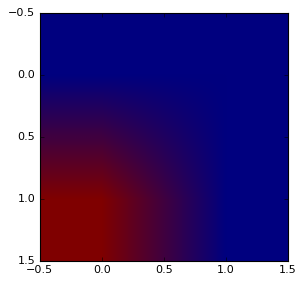

In [18]:
array = np.array([[1,3],[11111,5]])
plt.imshow(array)
plt.show()

In [12]:
#np.where(df.columns=='bmd_bmda')
#np.where(df.columns=='g_ed')
#np.where(df.columns=='uid')

In [13]:
sum(df['yr']==2016)

9977

In [14]:
len(df['father'][df['yr']==2014])

13756

In [67]:
print('year total empty non_empty')
name_ = 'solvent'

for yr in set(df['yr']):
#yr = 2013
    s_null = sum(df[name_][df['yr']==yr].isnull())
    s_total = len(df[name_][df['yr']==yr])
    print(yr, s_total, s_null, s_total-s_null)

year total empty non_empty
2016 9977 0 9977
1996 16430 0 16430
1997 24519 0 24519
1998 28648 0 28648
1999 30333 0 30333
2000 34853 0 34853
2001 31918 0 31918
2002 31578 0 31578
2003 30948 0 30948
2004 34768 0 34768
2005 36342 0 36342
2006 38781 0 38781
2007 37623 0 37623
2008 38828 0 38828
2009 38274 0 38274
2010 34790 0 34790
2011 30952 0 30952
2012 29510 0 29510
2013 24775 0 24775
2014 13756 0 13756
2015 12780 0 12780


In [32]:
###  all types: 'str', 'float', 'numpy.int64', 'numpy.float64'
num_ = 0
for name in df.columns:
    if type(df[name][0])== np.float64:
        num_ += 1
print(num_)

### str: , float: , np.int64: , np.float64: 

600


In [41]:
len(df)

610383

In [46]:
import time

In [82]:
missing_value_stat = np.sum(np.array(df.isnull()),axis=0)

In [83]:
missing_value_stat = missing_value_stat/610383.

In [94]:
sum(missing_value_stat>0.5)

368

In [90]:
pd.DataFrame(missing_value_stat).describe()

,0
count,648.000000
mean,0.538179
std,0.399973
min,0.000000
25%,0.085411
50%,0.700861
75%,0.940265
max,1.000000


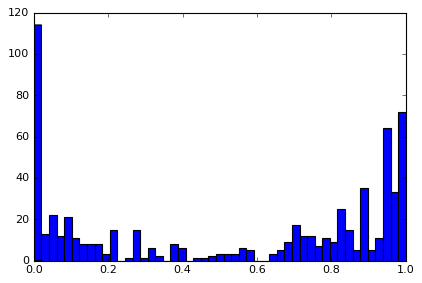

In [105]:
flat = missing_value_stat
bins = np.linspace(np.min(flat), np.max(flat), 50)
plt.hist(flat, bins=bins, color = 'blue')
plt.show()

In [98]:
df1 = df.dropna()

In [100]:
df1

,uid,gender,age,diabetes,yr,mon,day,bloodtype,whichhand,twins,...,igaantiea,igaantivca,ct_calcium,ntprobnp,caronormal,sevanum,sevaact,sevago,sevanom,testost


In [ ]:
type(df[name][0])

In [92]:
num_coming = df['uid'].value_counts()

In [98]:
print((num_coming).value_counts())
print(np.sum(num_coming))

3     36834
4     21812
5     14256
6      9774
7      7068
8      5393
9      3858
10     2934
11     2326
12     1841
13     1415
14     1092
15      882
16      667
17      452
18      295
19      211
20      107
21       54
22        8
24        4
23        3
25        2
33        1
28        1
35        1
Name: uid, dtype: int64
610383


In [107]:
[True, False] and [True, True]

[True, True]

In [110]:
list1 = list(df['dm_fg']<70)
list1 = list(df['dm_fg2']<70)
list1 = list(df['dm_g']<70)
list2 = list(df['diabetes']==1)
sum(list1 and list2)

6509

In [50]:
# CHECK features correlation
#t1 = time.time()
#corr = df.corr()
# print(time.time() - t1) = 612.4951391220093

In [68]:
corr.to_csv('corr.csv', index=False)

In [67]:
corr = pd.read_csv('corr.csv')

In [207]:
aaa = pd.DataFrame([[1,2,3],[4,5,6]])

In [208]:
aaa

,0,1,2
0,1,2,3
1,4,5,6


In [209]:

www = 
aaa.writerows('aaa.csv')

AttributeError: 'DataFrame' object has no attribute 'writerows'

In [44]:
select_list = [1,4,5,6,7]
corr.loc[corr.columns[select_list]][select_list]

,age,mon,day,bloodtype,whichhand
age,1.000000,-0.021035,-0.002461,-0.005908,-0.003610
mon,-0.021035,1.000000,-0.002054,-0.002543,-0.000064
day,-0.002461,-0.002054,1.000000,0.001519,0.002585
bloodtype,-0.005908,-0.002543,0.001519,1.000000,0.000899
whichhand,-0.003610,-0.000064,0.002585,0.000899,1.000000


In [24]:
corr.loc[:,'diabetes'].abs().sort_values(ascending=False)[1:50]

mdrug05           0.654692
psick10           0.608324
dm_g              0.510962
dm_fg2            0.499902
dm_fg             0.468721
ushba1c2          0.297062
ur_glu            0.266462
insulin           0.229324
android           0.166667
mdrug04           0.112014
g_bmi             0.105657
g_wc              0.104342
psick09           0.103299
scrnormal         0.098984
mdrug01           0.097857
g_cc              0.097142
g_cci             0.095805
g_whr             0.095460
bapwv_l           0.089535
age               0.087817
l_tg              0.085582
g_ssl             0.084724
as_liverus        0.083512
mcstop            0.083213
bapwv_r           0.083171
g_fat             0.079690
ee_k              0.079415
cyfra21_1         0.078432
relate50b         0.075259
mdrug07           0.074486
antihbe           0.073817
g_wei             0.073429
cocohabitamoun    0.072138
g_dsl             0.071603
lgsnormal         0.070436
lf_ggt            0.069531
g_ssr             0.067857
g

In [64]:
lst_1 = corr.loc[:,'diabetes'].abs().sort_values(ascending=False)[1:50]
lst_1.index

Index(['mdrug05', 'psick10', 'dm_g', 'dm_fg2', 'dm_fg', 'ushba1c2', 'ur_glu',
       'insulin', 'android', 'mdrug04', 'g_bmi', 'g_wc', 'psick09',
       'scrnormal', 'mdrug01', 'g_cc', 'g_cci', 'g_whr', 'bapwv_l', 'age',
       'l_tg', 'g_ssl', 'as_liverus', 'mcstop', 'bapwv_r', 'g_fat', 'ee_k',
       'cyfra21_1', 'relate50b', 'mdrug07', 'antihbe', 'g_wei',
       'cocohabitamoun', 'g_dsl', 'lgsnormal', 'lf_ggt', 'g_ssr', 'g_hc',
       'firstchild_05', 'mdrug03', 'totalbody', 'g_dsr', 'marriage_14',
       'hs_crp', 'thynormal', 'sgsnormal', 'yr', 'au_l', 'lf_gpt'],
      dtype='object')

In [25]:
corr.loc[:,'diabetes'].abs().sort_values(ascending=False)[50:100]

havigg            0.054796
nopsick           0.054710
relate49b         0.054280
smokeyear_09      0.053969
bmd_loc           0.053854
au_r              0.053341
x_kub             0.053102
ur_pro            0.051652
cocohabityear     0.049249
e2                0.048755
lf_got            0.048424
x_che             0.048267
education         0.048161
occupation        0.047677
psick12           0.047669
eyenormal         0.046347
relate63b         0.046163
relate48b         0.045956
relate52b_14      0.045636
rsick10           0.044817
marriage_98       0.044717
isd_sytpha        0.044638
l_ch              0.042843
urinebap          0.042732
psick21           0.041869
cpi_ca            0.040982
rf_bun            0.040722
firstchild_01     0.040698
cr_fobt           0.040441
smokeamoun_03     0.040247
cbc_leu           0.039611
i_crp             0.038977
opheart_96        0.038907
ranormal_val      0.038716
rabella           0.038490
relate52b_03      0.038482
exerciseperiod    0.037886
v

In [26]:
corr.loc[:,'diabetes'].abs().sort_values(ascending=False)[100:150]

secondsportfrequ    0.033237
lipo                0.032454
otherproblem_ex     0.032394
relate20a           0.032349
pf_fev1             0.032286
drinkyear           0.031939
psick23             0.031587
pf_fvc              0.030496
food20_98           0.029866
cbc_hema            0.029809
snenormal           0.029640
firstsportfrequ     0.029561
relate44b           0.029398
c13                 0.029243
sndnormal           0.029231
sncnormal           0.029150
g_pul               0.029071
isd_hbabcv          0.028932
snbnormal           0.028650
as_kid              0.028611
secondsport         0.028385
aboutbonejoints     0.028199
lf_ldh              0.027657
cbc_hemo            0.027654
relate07a           0.027553
jogging             0.026762
earlobe             0.026711
nsmokeyear_09       0.026627
vi_tonl             0.026565
emotional           0.026306
marriage_96         0.026299
x_ugi               0.025999
tu_cea              0.025949
food18_98           0.025670
opbubble_96   

In [27]:
corr.loc[:,'diabetes'].abs().sort_values(ascending=False)[150:200]

opno                   0.023343
forehead               0.023326
ua_ua                  0.023111
cause_cantsport        0.023030
ur_sdcalo              0.022596
npnormal               0.022590
ballsports             0.022420
drinkkind1             0.022367
sleeptype6             0.022287
relate02a              0.022251
opur_96                0.022097
fincome                0.022062
opfemale_01            0.021719
g_ac                   0.021586
relate59b              0.021439
l_chol                 0.021410
opbrain_96             0.021280
smokeornot_03          0.020610
envion05               0.020566
g_dlr                  0.020363
relate61b_14           0.020339
opother_96             0.020077
g_ed                   0.020021
lightsport             0.019900
ekg_ekg                0.019715
opchest_96             0.019670
cbc_rdw                0.019592
ent_ear                0.019457
lfmmfper               0.019416
relate21a              0.019394
physical_fitness       0.019325
oplung_9

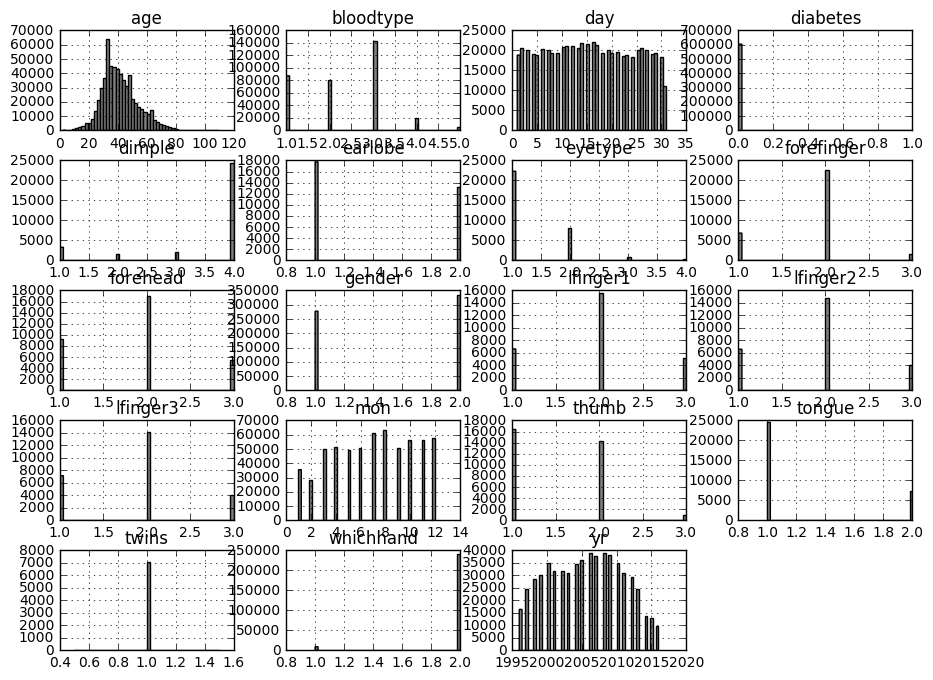

In [15]:
#df_train.info()
df[df.columns[:20]].hist(bins=50, figsize=(11,8),color='grey')
plt.show()

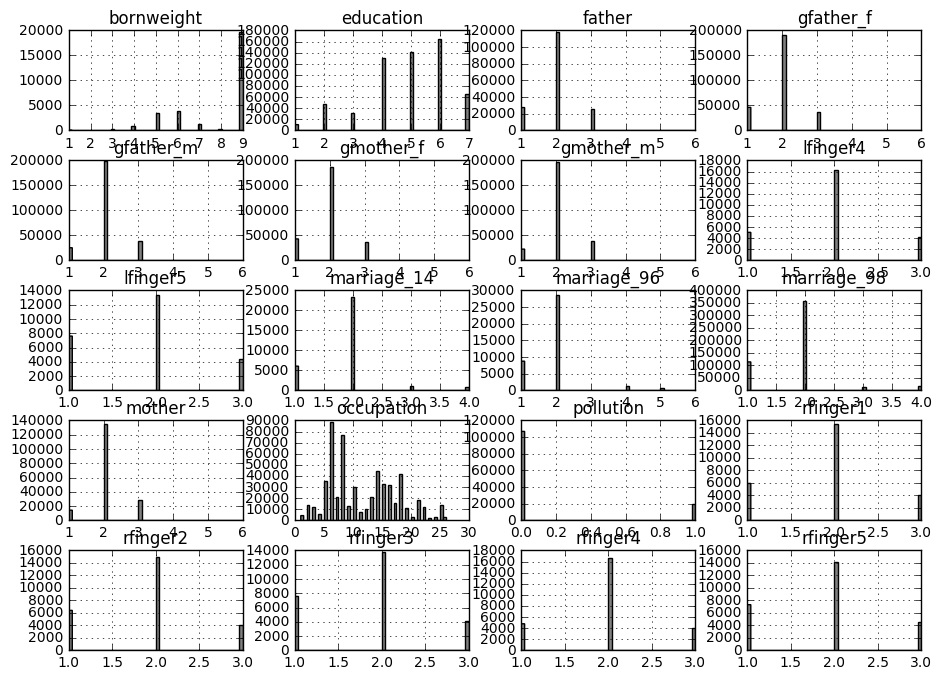

In [16]:
df[df.columns[20:40]].hist(bins=50, figsize=(11,8),color='grey')
plt.show()

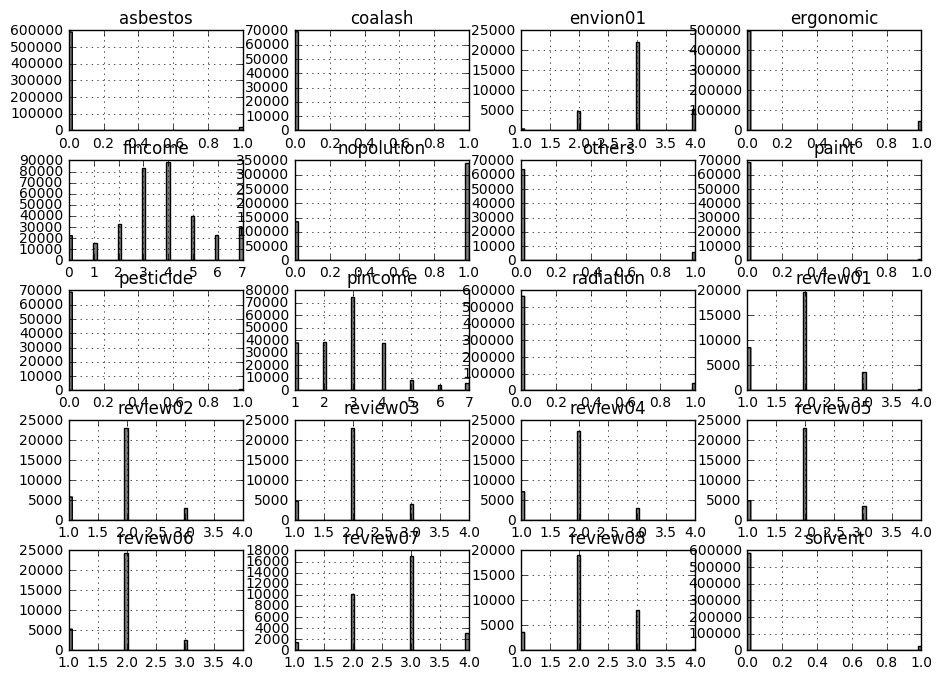

In [17]:
df[df.columns[40:60]].hist(bins=50, figsize=(11,8),color='grey')
plt.show()

In [11]:
df.columns[:100]

Index(['uid', 'gender', 'age', 'diabetes', 'yr', 'mon', 'day', 'bloodtype',
       'whichhand', 'twins', 'earlobe', 'tongue', 'forehead', 'eyetype',
       'dimple', 'thumb', 'forefinger', 'lfinger1', 'lfinger2', 'lfinger3',
       'lfinger4', 'lfinger5', 'rfinger5', 'rfinger4', 'rfinger3', 'rfinger2',
       'rfinger1', 'bornweight', 'father', 'gfather_f', 'gmother_f', 'mother',
       'gfather_m', 'gmother_m', 'marriage_96', 'marriage_98', 'marriage_14',
       'education', 'occupation', 'pollution', 'solvent', 'asbestos',
       'coalash', 'paint', 'radiation', 'pesticide', 'others', 'ergonomic',
       'nopolution', 'fincome', 'pincome', 'review01', 'review02', 'review03',
       'review04', 'review05', 'review06', 'review07', 'review08', 'envion01',
       'envion02', 'envion03', 'envion04', 'envion05', 'relate48b',
       'relate49b', 'relate50b', 'firstchild_01', 'firstchild_05', 'suckle',
       'relate51b', 'relate52b_03', 'relate52b_14', 'mcstop', 'mcstopage',
       'mclasty

In [12]:
df.columns[100:200]

Index(['psick04', 'psick05', 'psick06', 'psick07', 'psick08', 'psick09',
       'psick10', 'psick11', 'psick12', 'psick13', 'psick14', 'psick15',
       'psick16', 'psick17', 'psick18', 'psick19', 'psick20', 'psick21',
       'psick22', 'psick23', 'psick24', 'psick25', 'psick26', 'psick27',
       'psick28', 'relate46b', 'operationy', 'opbrain_96', 'opbrain_01',
       'opeye_96', 'opeye_01', 'opent_96', 'opent_03', 'relate32b', 'opt3_96',
       'opt3_01', 'oplung_96', 'oplung_01', 'opheart_96', 'opheart_01',
       'opchest_96', 'opchest_01', 'relate54b', 'opstomach_96', 'opstomach_01',
       'opbubble_96', 'opbubble_01', 'opodigest_96', 'opodigest_01',
       'opcaecum_00', 'opcaecum_01', 'opur_96', 'opur_01', 'opsubur_96',
       'opsubur_01', 'relate58b', 'opfemale_96', 'opfemale_01', 'relate47b',
       'opbone_96', 'opbone_01', 'opother_96', 'opother_01', 'opno', 'rsickno',
       'rsick01', 'rsick02', 'rsick03', 'rsick04', 'rsick05', 'rsick06',
       'rsick07', 'rsick08', 'rs

In [13]:
df.columns[200:300]

Index(['relate29a', 'relate30a', 'relate33b_99', 'relate33b_01', 'wstatus',
       'relate34b', 'relate08a', 'relate21b', 'relate22b', 'relate23b',
       'relate35b', 'relate31b', 'relate01a', 'relate02a', 'relate03a',
       'relate04a', 'relate06a', 'relate09a', 'relate13a', 'relate14a',
       'relate18a', 'relate19a', 'relate20a', 'relate25a', 'relate26a',
       'relate27a', 'relate28a', 'relate36b', 'eara', 'earb', 'earc', 'eard',
       'eare', 'earf', 'nosea', 'noseb', 'nosec', 'nosed', 'nosee', 'nosef',
       'noseg', 'throata', 'throatb', 'throatc', 'throatd', 'throate',
       'throatf', 'neck', 'relate24b', 'relate25b', 'relate62b', 'relate26b',
       'relate63b', 'relate27b', 'relate28b_96', 'relate28b_03', 'relate29b',
       'relate43b', 'relate44b', 'relate45b', 'relate30b', 'relate56b',
       'relate57b', 'relate59b', 'relate60b', 'relate61b_03', 'relate61b_14',
       'smokeornot_96', 'smokeornot_97', 'smokeornot_98', 'smokeornot_03',
       'smokeyear_96', 'smoke

In [14]:
df.columns[300:400]

Index(['sleeptype3', 'sleeptype4', 'sleeptype5', 'sleeptype6', 'workstreng',
       'aboutbonejoints', 'chestpain_noneex', 'chestpain_ex', 'lostsense',
       'firstsport', 'lightsport', 'meansport', 'heavysport', 'violtsport',
       'sportornot_96', 'sportornot_97', 'sportornot_98', 'firstsportfrequ',
       'firstsporttime', 'firstsportbreath', 'secondsport', 'secondsportfrequ',
       'secondsporttime', 'secondsportbreath', 'otherproblem_ex',
       'cause_cantsport', 'weight_control', 'intensify_heartlung',
       'intensify_endurance', 'improve_flexibility', 'physical_fitness',
       'reduce_pressure', 'exercise_others', 'exerciseperiod', 'exercisetype',
       'jogging', 'speedwalking', 'powerwalking', 'bicycle', 'ballsports',
       'gym', 'swimming', 'ex_others', 'exercisecompared', 'pulse_rate',
       'pulse_rate_avg', 'foodtime', 'vegetarian', 'food14_96', 'food14_97',
       'food14_98', 'food15_96', 'food15_98', 'food16', 'food22', 'food17_96',
       'food17_98', 'food1

In [15]:
df.columns[400:500]

Index(['food19_98', 'food19_09', 'food20_96', 'food20_98', 'food23_96',
       'food23_98', 'food24_96', 'food24_98', 'food25_96', 'food25_98',
       'nutrino', 'nutri01', 'nutri02', 'nutri03', 'nutri04', 'nutri05',
       'nutri06', 'nutri07', 'nutri08', 'nutri09', 'nutri10', 'nutri11',
       'nutri12', 'nutri13', 'nutri14', 'nutri15', 'nutri16', 'nutri17',
       'nutri18', 'g_hei', 'g_wei', 'g_bmi', 'g_fat', 'g_wc', 'g_hc', 'g_whr',
       'g_temp', 'g_ac', 'g_sll', 'g_slr', 'g_ssl', 'g_ssr', 'g_dll', 'g_dlr',
       'g_dsl', 'g_dsr', 'g_pul', 'g_rr', 'g_cc', 'g_cci', 'g_ed', 'cbc_leu',
       'cbc_ery', 'cbc_hemo', 'cbc_hema', 'cbc_mcv', 'cbc_mch', 'cbc_mchc',
       'cbc_rdw', 'cbc_pla', 'wbc_n', 'wbc_l', 'wbc_m', 'wbc_e', 'wbc_b',
       'dm_fg', 'dm_fg2', 'dm_g', 'lf_tb', 'lf_db', 'lf_tp', 'lf_alb', 'lf_ag',
       'lf_glo', 'lf_alp', 'lf_got', 'lf_gpt', 'lf_ggt', 'lf_ldh', 'rf_bun',
       'rf_cre', 'rf_egfr', 'ua_ua', 'l_tg', 'l_chol', 'l_hdlc', 'l_ldlc',
       'l_ch', 'cpi

In [16]:
df.columns[500:600]

Index(['isd_hbabcv', 'tu_afp', 'tu_cea', 'tf_t3', 'tf_t4', 'tf_ft4', 'tf_tsh',
       'i_crp', 'i_rafo', 'i_raf', 'isd_syrpr', 'isd_sytpha', 'bg_type',
       'bg_rh', 'ur_leu', 'ur_app', 'ur_pro', 'ur_glu', 'ur_bil', 'ur_urob',
       'ur_ob', 'ur_ket', 'ur_nit', 'ur_sg', 'ur_ph', 'ur_sdrlo', 'ur_sdrhi',
       'ur_sdwlo', 'ur_sdwhi', 'ur_sdeplo', 'ur_sdephi', 'ur_sdcalo',
       'ur_sdcaup', 'ur_sdbac', 'ur_ot', 'cr_stool', 'as_liverus', 'as_idu',
       'as_cbdu', 'as_gall', 'as_kid', 'as_hpv', 'as_pan', 'as_spl', 'x_che',
       'x_kub', 'x_ugi', 'ekg_ekg', 'ent_ear', 'ent_nose', 'ent_thr', 'ent_np',
       'ent_op', 'ent_neck', 'pf_fvc', 'pf_fev1', 'pf_mmf', 'au_l', 'au_r',
       'vi_sle', 'vi_vanr', 'vi_vacr', 'vi_vanl', 'vi_vacl', 'vi_color',
       'vi_stra', 'vi_ast', 'vi_tonl', 'vi_tonr', 'gy_pap', 'bmd_bmd',
       'bmd_loc', 'bmd_bmds', 'bmd_bmda', 'abi_l', 'abi_r', 'bapwv_l',
       'bapwv_r', 'android', 'totalbody', 'insulin', 'ushba1c2', 'lipo',
       'ca72_4', 'cyfra2

In [17]:
df.columns[600:]

Index(['lh', 'prolact', 'bmdanaly', 'tpos2', 'tpos3', 'tscore2', 'tscore3',
       'tlnormal', 'urinebap', 'hivnormal', 'cvirus', 'psa', 'urinedpd',
       'ca15_3', 'ca125', 'ca19_9', 'sgsnormal', 'lgsnormal', 'snanormal',
       'snbnormal', 'sncnormal', 'sndnormal', 'snenormal', 'npnormal', 'hpv',
       'hpyloriab', 'c13_val', 'c13', 'havigg', 'hbsag', 'antihbs', 'antihbc',
       'hbeag_val', 'hbeag', 'antihbe_val', 'antihbe', 'rabella',
       'igaantivca_val', 'igaantiea', 'igaantivca', 'ct_calcium', 'ntprobnp',
       'caronormal', 'sevanum', 'sevaact', 'sevago', 'sevanom', 'testost'],
      dtype='object')

### 丟棄'name', 'seller', 'offerType', 'model', 'nrOfPictures'

In [4]:
df = df.drop(['name', 'seller', 'offerType', 'model', 'nrOfPictures' ], axis = 1)

In [5]:
df_test = df_test.drop(['name', 'seller', 'offerType', 'model', 'nrOfPictures' ], axis = 1)